In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"D:\\MLops\Amazon Chat Insights Sentiment & Summarization\\amazon_chat_data\\topical_chat.csv.xlsx")


In [3]:
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpful...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [5]:
print("Shape: ",df.shape)

Shape:  (188378, 3)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188378 entries, 0 to 188377
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   conversation_id  188378 non-null  int64 
 1   message          188373 non-null  object
 2   sentiment        188378 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [7]:
df.describe(include='all')

,conversation_id,message,sentiment
count,188378.000000,188373,188378
unique,NaN,184111,8
top,NaN,"Hi, how are you?",Curious to dive deeper
freq,NaN,317,80888
mean,4313.102581,NaN,NaN
std,2491.096394,NaN,NaN
min,1.000000,NaN,NaN
25%,2156.000000,NaN,NaN
50%,4310.000000,NaN,NaN
75%,6469.000000,NaN,NaN


sentiment
Curious to dive deeper    80888
Neutral                   41367
Surprised                 30638
Happy                     29617
Sad                        2533
Disgusted                  1433
Fearful                    1026
Angry                       876
Name: count, dtype: int64


C:\Users\UDAY KUMAR\AppData\Local\Temp\ipykernel_45804\3661602642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")


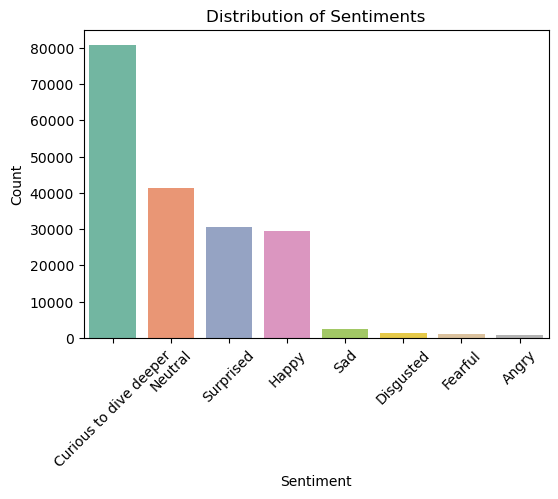

In [8]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


1. Highly skewed data with **“Curious to dive deeper”** dominating.
2. To get a better performing multi-class model, compensate for rare classes using class weights, oversampling, or other methods.
3. Evaluate with metrics (like macro-F1) that highlight minority-class performance rather than raw accuracy.

##  Messages per Conversation

Avg messages per conversation: 21.832753824756605
Max messages in a single conversation: 53
Min messages in a single conversation: 20


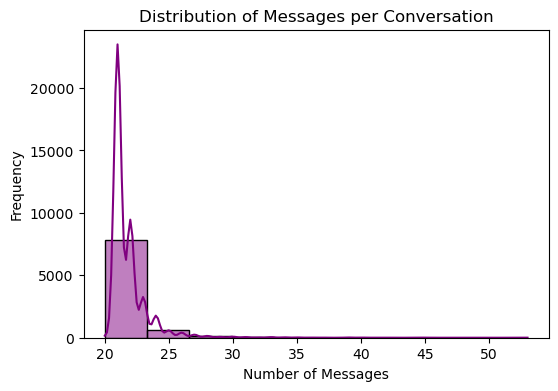

In [9]:
message_counts = df.groupby('conversation_id')['message'].count()
message_counts.head()  # just to see the first few

print("Avg messages per conversation:", message_counts.mean())
print("Max messages in a single conversation:", message_counts.max())
print("Min messages in a single conversation:", message_counts.min())

# Visualize distribution
plt.figure(figsize=(6,4))
sns.histplot(message_counts, bins=10, kde=True, color='purple')
plt.title("Distribution of Messages per Conversation")
plt.xlabel("Number of Messages")
plt.ylabel("Frequency")
plt.show()


**Interpretation**

1. Most conversations hover around 20–25 messages, with a few outliers going up to 53.
2. From the distribution plot (peak around 20–23 messages), it suggests the dataset’s conversations are fairly uniform in length, with a long tail of slightly larger conversations.
3. For summarization, each conversation is relatively short/medium length (compared to hundreds of messages). That’s good—it’s easier for summarizing models.

## Message Length Analysis

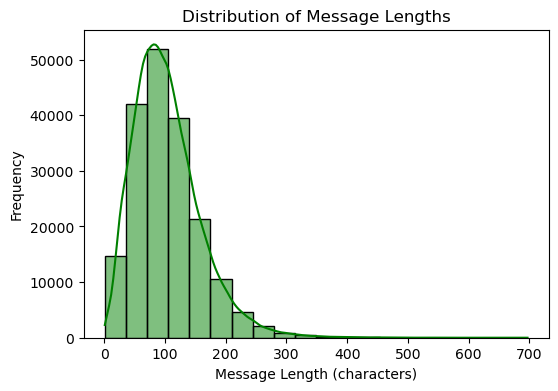

count    188378.000000
mean        103.509120
std          55.836831
min           1.000000
25%          64.000000
50%          95.000000
75%         133.000000
max         697.000000
Name: message_length, dtype: float64

In [10]:
df['message_length'] = df['message'].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df['message_length'], bins=20, kde=True, color='green')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Quick stats on message length
df['message_length'].describe()


**Interpretation**

1. Most messages average around 100 characters, which is relatively short (similar to a tweet).
2. There’s a long tail up to 697 characters, which might be just a handful of outliers.
3. The histogram suggests a somewhat right-skewed distribution, with the bulk of messages under ~200 characters.

In [11]:
sample_convo_id = 1
sample_convo = df[df['conversation_id'] == sample_convo_id]

for idx, row in sample_convo.iterrows():
    print(f"[Sentiment: {row['sentiment']}] {row['message']}")
    print("-" * 80)


[Sentiment: Curious to dive deeper] Are you a fan of Google or Microsoft?
--------------------------------------------------------------------------------
[Sentiment: Curious to dive deeper] Both are excellent technology they are helpful in many ways. For the security purpose both are super.
--------------------------------------------------------------------------------
[Sentiment: Curious to dive deeper]  I'm not  a huge fan of Google, but I use it a lot because I have to. I think they are a monopoly in some sense. 
--------------------------------------------------------------------------------
[Sentiment: Curious to dive deeper]  Google provides online related services and products, which includes online ads, search engine and cloud computing.
--------------------------------------------------------------------------------
[Sentiment: Curious to dive deeper]  Yeah, their services are good. I'm just not a fan of intrusive they can be on our personal lives. 
-------------------------

In [14]:
duplicates = df.duplicated(subset=['conversation_id', 'message','sentiment'], keep=False)



In [15]:
df[duplicates].sort_values(by='conversation_id')

,conversation_id,message,sentiment,message_length
21706,995,Good night!,Neutral,11
21707,995,Good night!,Neutral,11
23677,1085,Under the provisions of the 1912 scottish pro...,Happy,115
23686,1085,Under the provisions of the 1912 scottish pro...,Happy,115
27059,1239,"A popular Texas band, the Fabulous Thunderbir...",Happy,116
27060,1239,"A popular Texas band, the Fabulous Thunderbir...",Happy,116
29925,1369,Out of the top 10 most successful songs of al...,Happy,101
29929,1369,Out of the top 10 most successful songs of al...,Happy,101
33046,1513,It took the secret service four days to reali...,Happy,109
33050,1513,It took the secret service four days to reali...,Happy,109


In [16]:
# 1. Check initial size
initial_rows = df.shape[0]

# 2. Drop duplicates based on conversation_id, message, and sentiment
#    'keep="first"' means we keep the first occurrence and drop subsequent duplicates.
df.drop_duplicates(subset=['conversation_id', 'message', 'sentiment'], keep='first', inplace=True)

# 3. Check how many rows were dropped
final_rows = df.shape[0]
print(f"Dropped {initial_rows - final_rows} duplicate rows.")


Dropped 31 duplicate rows.


In [17]:
df

,conversation_id,message,sentiment,message_length
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper,37
1,1,Both are excellent technology they are helpful...,Curious to dive deeper,101
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper,113
3,1,Google provides online related services and p...,Curious to dive deeper,116
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper,99
...,...,...,...,...
188373,8628,"Wow, it does not seem like that long. Since I...",Surprised,207
188374,8628,"I havent seen that episode, I might google it...",Curious to dive deeper,98
188375,8628,I don't think I have either. That's an insane ...,Curious to dive deeper,106
188376,8628,"I did, my little brother used to love Thomas ...",Happy,97


In [21]:
import re
import nltk
import spacy
import string

In [23]:
df['message']

0                     Are you a fan of Google or Microsoft?
1         Both are excellent technology they are helpful...
2          I'm not  a huge fan of Google, but I use it a...
3          Google provides online related services and p...
4          Yeah, their services are good. I'm just not a...
                                ...                        
188373     Wow, it does not seem like that long. Since I...
188374     I havent seen that episode, I might google it...
188375    I don't think I have either. That's an insane ...
188376     I did, my little brother used to love Thomas ...
188377     It did. Ringo Starr, George Carlin, and Alec ...
Name: message, Length: 188347, dtype: object

In [24]:
# Lower the message
df['message'] = df['message'].str.lower()

In [25]:
df

,conversation_id,message,sentiment,message_length
0,1,are you a fan of google or microsoft?,Curious to dive deeper,37
1,1,both are excellent technology they are helpful...,Curious to dive deeper,101
2,1,"i'm not a huge fan of google, but i use it a...",Curious to dive deeper,113
3,1,google provides online related services and p...,Curious to dive deeper,116
4,1,"yeah, their services are good. i'm just not a...",Curious to dive deeper,99
...,...,...,...,...
188373,8628,"wow, it does not seem like that long. since i...",Surprised,207
188374,8628,"i havent seen that episode, i might google it...",Curious to dive deeper,98
188375,8628,i don't think i have either. that's an insane ...,Curious to dive deeper,106
188376,8628,"i did, my little brother used to love thomas ...",Happy,97


In [26]:
# Droping empty messages: 

# Drop rows where message is empty or only whitespace
df = df[df['message'].str.strip().astype(bool)]


In [27]:
df.shape

(188347, 4)

In [28]:
empty_mask = df['message'].str.strip().eq('')
print("Number of empty messages:", empty_mask.sum())


Number of empty messages: 0


In [31]:
sentiment_per_convo = pd.crosstab(df['conversation_id'], df['sentiment'])
sentiment_per_convo.head()


sentiment,Angry,Curious to dive deeper,Disgusted,Fearful,Happy,Neutral,Sad,Surprised
conversation_id,,,,,,,,
1,0,20,0,0,1,0,0,0
2,0,21,0,0,0,0,0,0
3,0,4,0,0,3,5,0,9
4,0,4,0,0,3,9,0,7
5,0,20,0,0,1,0,0,0


In [32]:
import re

def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""  # Handle non-string edge cases
    
    # 1) Fix encoding issues (e.g., replace \xa0 with a space)
    text = text.replace('\xa0', ' ')
    
    # 2) Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 3) Remove multiple spaces or newlines
    text = re.sub(r'\s+', ' ', text)
    
    # 4) Strip leading/trailing spaces
    text = text.strip()
    
    return text


In [33]:
# Apply cleaning to the 'message' column
df['message'] = df['message'].apply(clean_text)

In [34]:
df

,conversation_id,message,sentiment,message_length
0,1,are you a fan of google or microsoft?,Curious to dive deeper,37.0
1,1,both are excellent technology they are helpful...,Curious to dive deeper,101.0
2,1,"i'm not a huge fan of google, but i use it a l...",Curious to dive deeper,113.0
3,1,google provides online related services and pr...,Curious to dive deeper,116.0
4,1,"yeah, their services are good. i'm just not a ...",Curious to dive deeper,99.0
...,...,...,...,...
188373,8628,"wow, it does not seem like that long. since i ...",Surprised,207.0
188374,8628,"i havent seen that episode, i might google it ...",Curious to dive deeper,98.0
188375,8628,i don't think i have either. that's an insane ...,Curious to dive deeper,106.0
188376,8628,"i did, my little brother used to love thomas t...",Happy,97.0


In [ ]:
# df.to_excel(r"D:\\MLops\Amazon Chat Insights Sentiment & Summarization\\amazon_chat_data\\topical_chat_Cleaned.xlsx",index=False)

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer)
from sklearn.metrics import accuracy_score, f1_score
import torch
import torch.nn as nn
import os

In [2]:
print("CUDA Available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

CUDA Available: False
Number of GPUs: 0


In [3]:
############################################
# 1) Load Data
############################################
excel_path = r"D:\MLops\Amazon Chat Insights Sentiment & Summarization\amazon_chat_data\topical_chat_Cleaned.xlsx"
df = pd.read_excel(excel_path)

In [4]:
# Map sentiments to integer labels
sentiment2id = {
    "Curious to dive deeper": 0,
    "Happy": 1,
    "Neutral": 2,
    "Surprised": 3,
    "Disgusted": 4,
    "Sad": 5,
    "Fearful": 6,
    "Angry": 7
}
df['label'] = df['sentiment'].map(sentiment2id)

# Drop the original sentiment column, keep numeric label
data = deepcopy(df.drop(['sentiment'], axis=1))

In [5]:
############################################
# 2) Split Data
############################################
train_df, test_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    stratify=data["label"]
)
print("Train shape:", train_df.shape, " Test shape:", test_df.shape)

Train shape: (150677, 3)  Test shape: (37670, 3)


In [6]:
############################################
# 3) Model Candidates
############################################
model_candidates = [
    "roberta-base"
]

In [7]:
############################################
# 4) Metrics
############################################
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    return {"accuracy": acc, "macro_f1": f1}

In [8]:
############################################
# 5) Clean & Prepare Data
############################################
train_df["message"] = train_df["message"].astype(str).str.strip()
test_df["message"] = test_df["message"].astype(str).str.strip()

# Drop rows where 'message' is NaN
train_df = train_df.dropna(subset=["message"])
test_df = test_df.dropna(subset=["message"])

# Remove empty messages
train_df = train_df[train_df["message"] != ""]
test_df = test_df[test_df["message"] != ""]

print("After cleaning, Train:", train_df.shape, "Test:", test_df.shape)

After cleaning, Train: (150677, 3) Test: (37670, 3)


In [9]:
############################################
# 6) Class Weights for Imbalance
############################################
label_counts = train_df["label"].value_counts().sort_index()
num_classes = len(label_counts)
total_samples = len(train_df)

class_weights_list = []
for c in range(num_classes):
    count_c = label_counts[c]
    w = total_samples / (num_classes * count_c)
    class_weights_list.append(w)

class_weights = torch.tensor(class_weights_list, dtype=torch.float)
print("Class Weights:", class_weights)


Class Weights: tensor([ 0.2911,  0.7953,  0.5693,  0.7685, 16.4208,  9.2965, 22.9411, 26.8682])


In [10]:
############################################
# 7) Weighted Trainer
############################################
class WeightedTrainer(Trainer):
    def __init__(self, class_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs["labels"]
        outputs = model(**inputs)
        logits = outputs.get("logits")
        
        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights.to(logits.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
############################################
# 8) Train Loop: 50 Epochs & Track Best Model
############################################
results = {}
log_history_dict = {}

best_model_name = None
best_macro_f1 = 0.0
best_trainer = None
best_tokenizer = None

for model_name in model_candidates:
    print(f"\n=== Fine-tuning {model_name} ===\n")
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

    # Convert dataframes to Hugging Face Datasets
    train_dataset = Dataset.from_pandas(train_df[["message", "label"]])
    test_dataset = Dataset.from_pandas(test_df[["message", "label"]])

    def tokenize_function(batch):
        return tokenizer(
            batch["message"],
            padding="max_length",
            truncation=True,
            max_length=128
        )

    train_dataset = train_dataset.map(tokenize_function, batched=True)
    test_dataset = test_dataset.map(tokenize_function, batched=True)

    train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
    test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

    training_args = TrainingArguments(
        output_dir=f"./{model_name}-finetuned",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=50,  
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        logging_dir=f"./{model_name}-logs",
        load_best_model_at_end=True,
        report_to=[]  # Disable reporting to external systems (MLflow, WandB, etc.)
    )

    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
        class_weights=class_weights
    )

    # Start Training
    trainer.train()

    # Evaluate
    eval_result = trainer.evaluate()
    results[model_name] = eval_result
    print(f"{model_name} -> {eval_result}\n")

    log_history_dict[model_name] = trainer.state.log_history

    # Check if this model is the best so far
    if eval_result["macro_f1"] > best_macro_f1:
        best_macro_f1 = eval_result["macro_f1"]
        best_model_name = model_name
        best_trainer = trainer
        best_tokenizer = tokenizer

print("All model results:", results)
print(f"Best model: {best_model_name} with macro_f1={best_macro_f1:.4f}")

############################################
# 9) Save the Best Model Locally
############################################
if best_trainer and best_tokenizer:
    save_path = r"D:\MLops\Amazon Chat Insights Sentiment & Summarization\final_model"
    # Make sure the directory exists
    import os
    os.makedirs(save_path, exist_ok=True)

    best_trainer.save_model(save_path)  # Saves the model weights
    best_tokenizer.save_pretrained(save_path)

    print(f"Best model ({best_model_name}) saved to {save_path}")



=== Fine-tuning roberta-base ===



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/150677 [00:00<?, ? examples/s]

Map:   0%|          | 0/37670 [00:00<?, ? examples/s]

c:\Users\UDAY KUMAR\anaconda3\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


In [ ]:

############################################
# 9) Save the Best Model Locally
############################################
if best_trainer and best_tokenizer:
    save_path = r"D:\MLops\Amazon Chat Insights Sentiment & Summarization\final_model"
    # Make sure the directory exists
    os.makedirs(save_path, exist_ok=True)

    best_trainer.save_model(save_path)  # Saves the model weights
    best_tokenizer.save_pretrained(save_path)

    print(f"Best model ({best_model_name}) saved to {save_path}")